 #  <p style="text-align: center;">Technical Support Data Analysis

Technical support data can often be a rich source of information on opportunities for improving customer experience. The lesser the trouble customers have with the product the better. Even better when the customers are able to overcome
technical challenge quickly with minimal effort. Let us analyze the tech support data and do some basic analysis on problem types, time to resolve the problem and channel of suppor that is most suitable

## Loading the Dataset

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

import sklearn.metrics

scratch_df = pd.read_csv("/content/sample_data/Nutrient Composition Dataset.csv")
scratch_df.dtypes

S.No          int64
Protein     float64
Fat         float64
vitaminC    float64
Fibre       float64
Product      object
dtype: object

The dataset contains one record for each unique problem type. It has metrics for each type like count, average calls to resolve, average resolution time etc.

In [4]:
scratch_df.shape

(1746, 6)

In [5]:
scratch_df.head()


,S.No,Protein,Fat,vitaminC,Fibre,Product
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with..."
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include..."
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT"
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned"


In [17]:
scratch_df['S.No'].head()

0    1
1    2
2    3
3    4
4    5
Name: S.No, dtype: int64

In [16]:
# prompt: Using dataframe scratch_df:

scratch_df.groupby('Product').mean()


,S.No,Protein,Fat,vitaminC,Fibre
Product,,,,,
"Alcoholic Beverage, wine, table, red, Cabernet Franc",13.0,1.100889,0.076211,0.263844,0.104491
"Alcoholic Beverage, wine, table, red, Cabernet Sauvignon",16.0,1.293180,0.823443,0.643089,1.108732
"Alcoholic Beverage, wine, table, red, Claret",17.0,0.770426,0.937573,0.683957,0.985971
"Alcoholic Beverage, wine, table, red, Lemberger",20.0,0.341878,0.191804,1.284545,0.073285
"Alcoholic Beverage, wine, table, red, Petite Sirah",23.0,0.645134,0.540929,1.098861,0.015189
...,...,...,...,...,...
"Yardlong bean, cooked, boiled, drained, without salt",1365.0,0.599253,0.428051,1.689817,1.872525
"Yogurt, fruit, low fat, 11g protein/8 oz",1369.0,0.586492,1.271776,1.944151,2.990253
"Yogurt, fruit, low fat,9 g protein/8 oz",1382.0,0.923616,0.566308,1.503984,1.118240


In [6]:
# prompt: Using dataframe scratch_df: suggest a plot

import altair as alt
alt.Chart(scratch_df).mark_bar().encode(
    x='Product',
    y='Protein',
    color='Product'
)


alt.Chart(...)

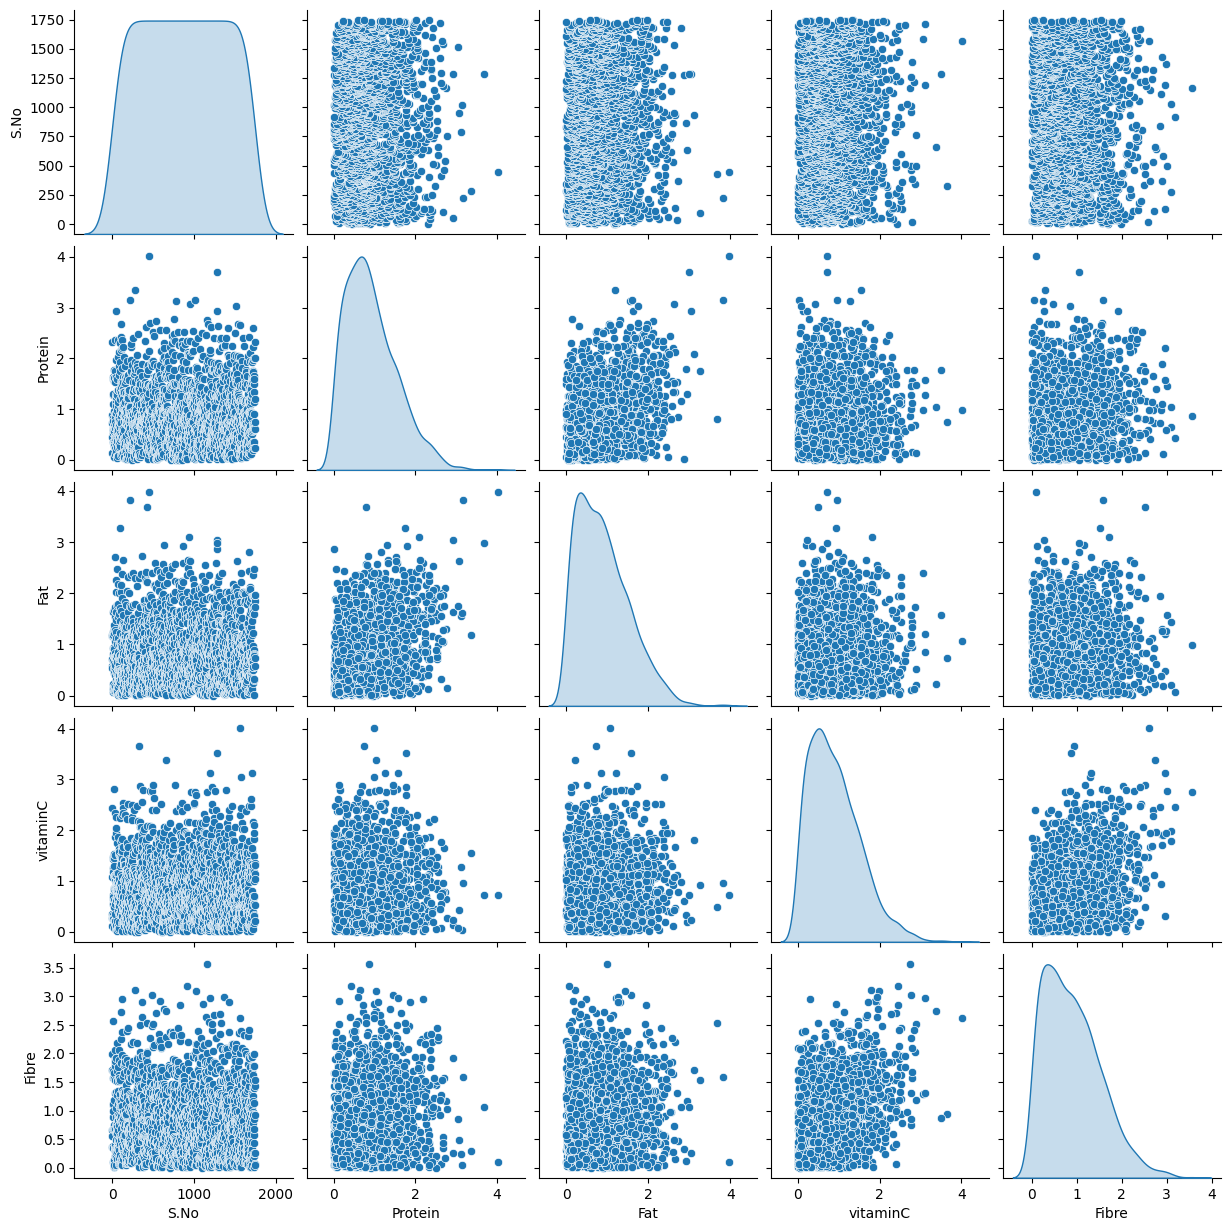

In [9]:
#techSuppAttr=scratch_df.iloc[:,1:]
#scratch_df=techSuppAttr.apply(zscore)
sns.pairplot(scratch_df,diag_kind='kde')

## Group Data into similar clusters

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

In [11]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(scratch_df)
    prediction=model.predict(scratch_df)
    meanDistortions.append(sum(np.min(cdist(scratch_df, model.cluster_centers_, 'euclidean'), axis=1)) / scratch_df.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


ValueError: could not convert string to float: 'Amaranth leaves, cooked, boiled, drained, without salt'

Though the bend is not coming out clearly as there are many bends, let us look at 3 clusters and 5 clusters

In [ ]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(scratch_df)
prediction=final_model.predict(scratch_df)

#Append the prediction
scratch_df["GROUP"] = prediction
scratch_df["GROUP"] = prediction
print("Groups Assigned : \n")
scratch_df.head()

C:\Users\chris.marcus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chris.marcus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Groups Assigned : 


,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,1
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,2
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,1
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,2
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,0


### Analyze the distribution of the data among the two groups (K = 3). One of the most informative visual tool is boxplot.


In [ ]:
techSuppClust = scratch_df.groupby(['GROUP'])
techSuppClust.mean()

TypeError: agg function failed [how->mean,dtype->object]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23c7bf60>,
      dtype=object)

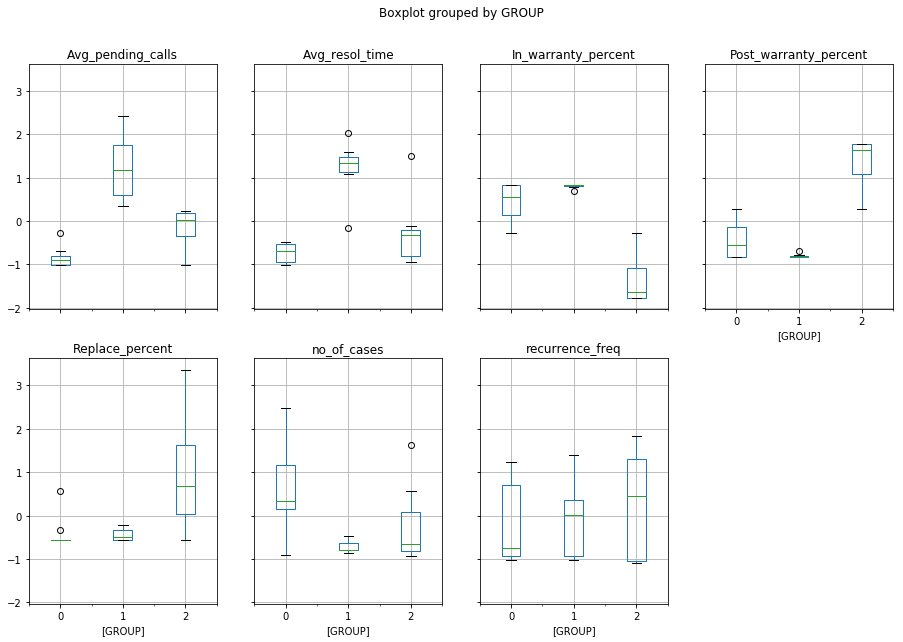

In [ ]:
scratch_df.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [ ]:
#  Let us next try with K = 5, the next elbow point

In [ ]:
# Let us first start with K = 5
final_model=KMeans(5)
final_model.fit(scratch_df)
prediction=final_model.predict(scratch_df)

#Append the prediction
scratch_df["GROUP"] = prediction
scratch_df["GROUP"] = prediction
print("Groups Assigned : \n")
scratch_df.head()

Groups Assigned : 


,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,4
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,0
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,4
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,0
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,1


In [ ]:
techSuppClust = scratch_df.groupby(['GROUP'])
techSuppClust.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,7.50,2.000000,79.000000,0.010000,0.600000,5.000000,95.000000
1,35.00,3.157143,132.571429,0.125714,0.021429,99.142857,0.857143
2,395.25,1.025000,7.750000,0.240000,0.000000,87.500000,12.500000
3,154.00,1.760000,35.400000,0.228000,0.142000,27.000000,73.000000
4,134.60,1.280000,31.000000,0.034000,0.048000,84.000000,16.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24579b70>,
      dtype=object)

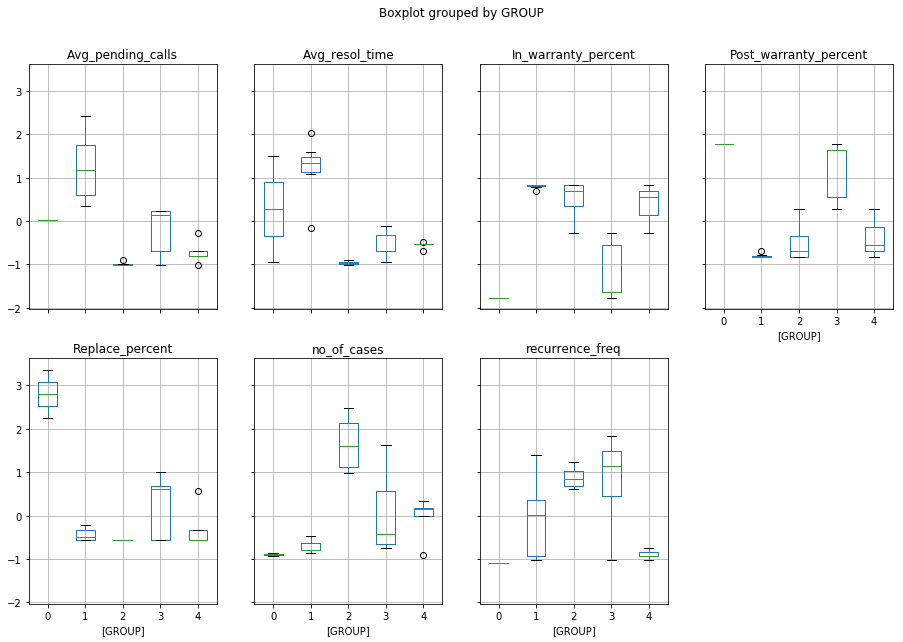

In [ ]:
scratch_df.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))